# Result summary of linkage analysis of all variants

In [ ]:
import pandas as pd
import numpy as np
import pickle
from SEQLinkage.linkage import *

In [ ]:
import glob

In [ ]:
path_ress=glob.glob('../data/wg20220316/chr22test/tmp/CACHE/chr22test*cutoff0.05_rho*.result')

In [ ]:
path_ress

['../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.45.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.4.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.35000000000000003.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.30000000000000004.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.25.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.2.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.15000000000000002.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.1.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.05.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05_rho0.0.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test1cutoff0.05_rho0.45.result',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test1cutoff0.05_rho0.4.result',
 '../data/wg

In [ ]:
smy_ress=[]
for path in path_ress:
    with open(path, 'rb') as handle:
        smy_ress.append(pickle.load(handle))

In [ ]:
smy_ress = pd.concat(smy_ress)

NameError: name 'smy_ress' is not defined

In [ ]:
smy_ress = smy_ress.reset_index(drop=True)

In [ ]:
smy_ress

,CHR,POS,A0,A1,SNP,LOD
0,chr1,13273,G,C,chr1:13273:G:C,-74.514730
1,chr1,13417,C,CGAGA,chr1:13417:C:CGAGA,-45.422910
2,chr1,14464,A,T,chr1:14464:A:T,-73.298011
3,chr1,14470,G,A,chr1:14470:G:A,-23.480194
4,chr1,14653,C,T,chr1:14653:C:T,-75.901918
...,...,...,...,...,...,...
2151550,chr1,248917571,T,C,chr1:248917571:T:C,0.000000
2151551,chr1,248841866,C,T,chr1:248841866:C:T,-0.278979
2151552,chr1,248913782,A,AT,chr1:248913782:A:AT,-0.278979
2151553,chr1,248918955,T,C,chr1:248918955:T:C,-0.278979


In [ ]:
with open('../data/wg20220316/chr1_common_variants.pickle','rb') as handle:
    com_vars = pickle.load(handle)

In [ ]:
com_vars

1                 chr1:10146:AC:A
5              chr1:10178:CCTAA:C
11         chr1:10247:TAAACCCTA:T
13                 chr1:10250:A:C
43                chr1:10439:AC:A
                    ...          
6803126       chr1:248945750:G:GT
6803162      chr1:248945852:T:TAG
6803168      chr1:248946252:GGT:G
6803170    chr1:248946254:T:TTAGG
6803173        chr1:248946255:G:T
Name: Otherinfo1, Length: 743228, dtype: object

In [ ]:
smy_ress_com = smy_ress[smy_ress.SNP.isin(com_vars)]

In [ ]:
smy_ress_com

,CHR,POS,A0,A1,SNP,LOD
0,chr1,13273,G,C,chr1:13273:G:C,-74.514730
1,chr1,13417,C,CGAGA,chr1:13417:C:CGAGA,-45.422910
2,chr1,14464,A,T,chr1:14464:A:T,-73.298011
4,chr1,14653,C,T,chr1:14653:C:T,-75.901918
7,chr1,14907,A,G,chr1:14907:A:G,-73.862812
...,...,...,...,...,...,...
2150962,chr1,248855548,T,C,chr1:248855548:T:C,-68.558368
2150963,chr1,248855917,G,C,chr1:248855917:G:C,-64.218025
2150964,chr1,248856006,C,T,chr1:248856006:C:T,-64.218025
2150965,chr1,248856131,C,T,chr1:248856131:C:T,-64.218025


## The results of all common variants (0/0.5)

In [ ]:
def get_common_smyress(path_ress,path_com_vars):
    smy_ress=[]
    for path in path_ress:
        with open(path, 'rb') as handle:
            smy_ress.append(pickle.load(handle))
    smy_ress = pd.concat(smy_ress)
    smy_ress = smy_ress.reset_index(drop=True)
    with open(path_com_vars,'rb') as handle:
        com_vars = pickle.load(handle)
    smy_ress_com = smy_ress[smy_ress.SNP.isin(com_vars)]
    return smy_ress_com

In [ ]:
smy_ress_lst=[]
for i in range(11,23):
    path_ress=glob.glob('../data/wg20220316/chr'+str(i)+'test/tmp/CACHE/chr'+str(i)+'test*cutoffNone.result')
    path_com_vars='../data/wg20220316/chr'+str(i)+'_common_variants.pickle'
    print(path_ress,path_com_vars)
    smy_ress_lst.append(get_common_smyress(path_ress,path_com_vars))

In [ ]:
smy_ress_lst1=[]
for i in range(1,9):
    path_ress=glob.glob('../data/wg20220316/chr'+str(i)+'test/tmp/CACHE/chr'+str(i)+'test*cutoffNone.result')
    path_com_vars='../data/wg20220316/chr'+str(i)+'_common_variants.pickle'
    print(path_ress,path_com_vars)
    smy_ress_lst1.append(get_common_smyress(path_ress,path_com_vars))

In [ ]:
smy_ress_lst2=[]
for i in range(9,11):
    path_ress=glob.glob('../data/wg20220316/chr'+str(i)+'test/tmp/CACHE/chr'+str(i)+'test*cutoffNone_rho0.result')
    path_com_vars='../data/wg20220316/chr'+str(i)+'_common_variants.pickle'
    print(path_ress,path_com_vars)
    smy_ress_lst2.append(get_common_smyress(path_ress,path_com_vars))

In [ ]:
smy_ress = pd.concat(smy_ress_lst)

In [ ]:
smy_ress1 = pd.concat(smy_ress_lst1)

In [ ]:
smy_ress2 = pd.concat(smy_ress_lst2)

In [ ]:
smy_ress = smy_ress.reset_index(drop=True)

In [ ]:
smy_ress1[smy_ress1.LOD>0]

,CHR,POS,A0,A1,SNP,LOD
14227,chr1,1821925,T,C,chr1:1821925:T:C,0.471855
14228,chr1,1868261,T,C,chr1:1868261:T:C,0.650163
40477,chr1,2470211,T,C,chr1:2470211:T:C,0.191862
41751,chr1,3351538,CCCTCTCTGTCCCCCTCCCTCTCTCATCCCCTTCCTCCTTCTCTCC...,C,chr1:3351538:CCCTCTCTGTCCCCCTCCCTCTCTCATCCCCTT...,0.311457
50400,chr1,3739760,T,C,chr1:3739760:T:C,0.692991
...,...,...,...,...,...,...
1022710,chr8,144168596,G,A,chr8:144168596:G:A,0.507806
1025308,chr8,144558594,T,TG,chr8:144558594:T:TG,1.202374
1028302,chr8,144729400,A,G,chr8:144729400:A:G,0.976691
1028883,chr8,144730442,CCGGGGG,C,chr8:144730442:CCGGGGG:C,0.135883


In [ ]:
smy_ress2[smy_ress2.LOD>0]

,CHR,POS,A0,A1,SNP,LOD
25483,chr9,20960741,A,C,chr9:20960741:A:C,0.091975
67240,chr9,27493820,C,T,chr9:27493820:C:T,0.023589
67253,chr9,27503408,T,C,chr9:27503408:T:C,0.667036
67306,chr9,27525024,A,T,chr9:27525024:A:T,0.411155
67314,chr9,27528890,C,G,chr9:27528890:C:G,0.464645
...,...,...,...,...,...,...
1315464,chr10,131198823,CT,C,chr10:131198823:CT:C,0.057446
1325235,chr10,132512606,T,C,chr10:132512606:T:C,0.827410
1327536,chr10,132512582,G,A,chr10:132512582:G:A,0.409920
1327537,chr10,132512611,A,G,chr10:132512611:A:G,0.542016


In [ ]:
tmp=pd.concat([smy_ress1[smy_ress1.LOD>0],smy_ress2[smy_ress2.LOD>0],smy_ress[smy_ress.LOD>0]])

In [ ]:
tmp=tmp.reset_index(drop=True)

In [ ]:
tmp.to_csv('../data/wg20220316/common_variants_rho0.csv',header=True)

### The results of lods score under grid opt

In [ ]:
def summary_grid_results_chrom(prefix):
    ress = [summary_grid_results_batch(prefix+str(i)+'cutoff0.05_rho') for i in range(len(glob.glob(prefix+'*.pickle')))]
    return pd.concat(ress)
def summary_grid_results_batch(prefix):
    smy_ress=None
    smy_rho=[]
    for r in np.arange(0.0,0.5,0.05):
        path=prefix+str(r)+'.result'
        with open(path, 'rb') as handle:
            res=pickle.load(handle)
        if smy_ress is None:
            smy_ress=[0]*res.shape[0]
            smy_rho=[r]*res.shape[0]
        for i,lod in enumerate(res.LOD):
            if lod>smy_ress[i]:
                smy_ress[i]=lod
                smy_rho[i]=round(r,2)
    res.LOD=smy_ress
    res['RHO']=smy_rho
    return res

In [ ]:
smy_ress = pd.concat([summary_grid_results_chrom('../data/wg20220316/chr'+str(c)+'test/tmp/CACHE/chr'+str(c)+'test') for c in range(18,23)])

In [ ]:
smy_ress.to_csv('../data/wg20220316/common_variants_chr18-23_grid_opt.csv',header=True,index=False)

In [ ]:
smy_ress=smy_ress.reset_index()

### The evidence of errors in imputation haplotypes

In [ ]:
smy_ress[smy_ress.SNP=='chr18:21826640:T:C']

,CHR,POS,A0,A1,SNP,LOD,RHO
2993,chr18,21826640,T,C,chr18:21826640:T:C,0.436928,0.40
0,chr18,21826640,T,C,chr18:21826640:T:C,0.532818,0.35


In [ ]:
smy_ress.iloc[37363:40553,:]

,CHR,POS,A0,A1,SNP,LOD,RHO
2993,chr18,21826640,T,C,chr18:21826640:T:C,0.436928,0.40
2994,chr18,21827440,G,A,chr18:21827440:G:A,0.315172,0.40
2995,chr18,21828568,G,A,chr18:21828568:G:A,0.000000,0.00
2996,chr18,21828930,A,G,chr18:21828930:A:G,0.000000,0.00
2997,chr18,21830172,TAGA,T,chr18:21830172:TAGA:T,0.495417,0.40
...,...,...,...,...,...,...,...
0,chr18,21826640,T,C,chr18:21826640:T:C,0.532818,0.35
1,chr18,21827440,G,A,chr18:21827440:G:A,0.185516,0.40
2,chr18,21828568,G,A,chr18:21828568:G:A,0.000000,0.00
3,chr18,21828930,A,G,chr18:21828930:A:G,1.376308,0.35


In [ ]:
smy_ress[smy_ress.SNP.duplicated(keep=False)].sort_values('SNP')

,index,CHR,POS,A0,A1,SNP,LOD,RHO
45325,4777,chr18,21826269,T,C,chr18:21826269:T:C,0.000000,0.00
38957,4587,chr18,21826269,T,C,chr18:21826269:T:C,0.000000,0.00
37363,2993,chr18,21826640,T,C,chr18:21826640:T:C,0.436928,0.40
40548,0,chr18,21826640,T,C,chr18:21826640:T:C,0.532818,0.35
45326,4778,chr18,21827040,T,C,chr18:21827040:T:C,0.000000,0.00
...,...,...,...,...,...,...,...,...
594952,3363,chr22,42512283,C,T,chr22:42512283:C:T,0.088713,0.40
594334,2745,chr22,42512291,C,CT,chr22:42512291:C:CT,0.677980,0.35
590483,1556,chr22,42512291,C,CT,chr22:42512291:C:CT,0.252430,0.40
601818,4571,chr22,45760566,G,A,chr22:45760566:G:A,0.890735,0.35


<AxesSubplot:>

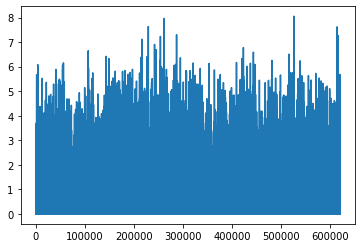

In [ ]:
smy_ress.LOD.plot()

<AxesSubplot:>

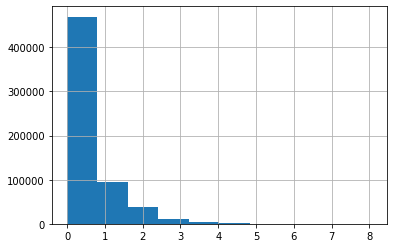

In [ ]:
smy_ress.LOD.hist()

In [ ]:
sum(smy_ress.LOD==0)/len(smy_ress)

0.3563068081956983

In [ ]:
smy_ress.LOD.sort_values()[310090:]

238976    0.186079
202402    0.186087
372607    0.186088
117820    0.186089
276794    0.186090
            ...   
286835    7.298402
614147    7.620271
229286    7.633120
261750    7.968009
526012    8.052230
Name: LOD, Length: 310089, dtype: float64

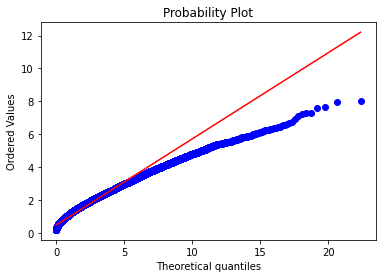

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(smy_ress.LOD.sort_values()[310090:], dist=stats.chi2(1), plot=pylab)
pylab.show()

### The results of linkage heterogeneity

In [ ]:
path_ress=glob.glob('../data/wg20220316/chr22test/tmp/CACHE/chr22test*cutoff0.05.besthlod')

In [ ]:
path_ress

['../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test1cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test2cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test3cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test4cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test5cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test6cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test7cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test8cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test9cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test10cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test11cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test12cutoff0.05.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22te

In [ ]:
smy_ress=[]
for path in path_ress:
    with open(path, 'rb') as handle:
        smy_ress.append(pickle.load(handle))

In [ ]:
smy_ress = pd.concat(smy_ress)

In [ ]:
smy_ress=smy_ress.sort_values(0)

<AxesSubplot:>

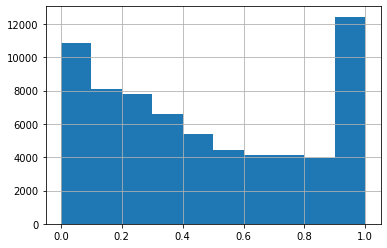

In [ ]:
smy_ress[2].hist()

In [ ]:
sum(smy_ress[3]>3.3)

837

<AxesSubplot:>

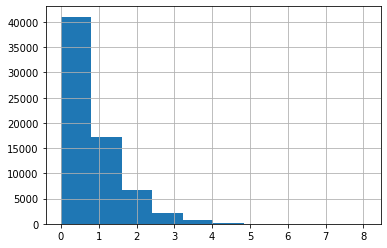

In [ ]:
smy_ress[3].hist()

<AxesSubplot:xlabel='0', ylabel='3'>

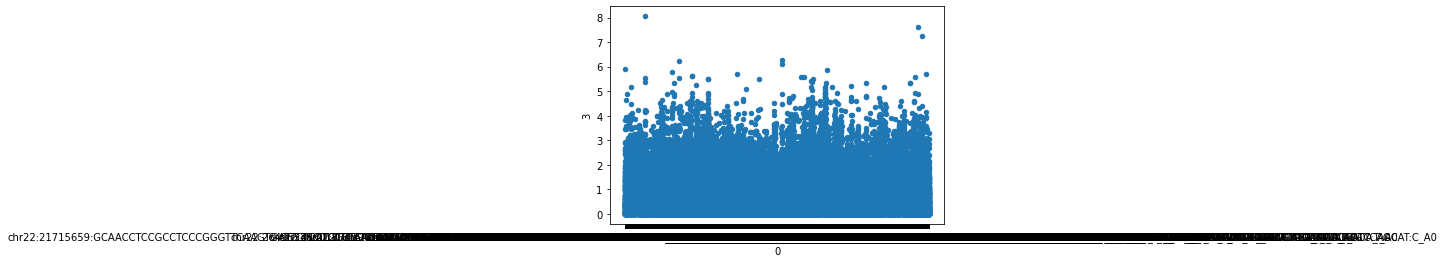

In [ ]:
smy_ress.plot.scatter(x=0,y=3)

In [ ]:
smy_ress[~smy_ress[0].duplicated(keep=False)].sort_values(0).to_csv('../data/wg20220316/common_variants_chr22_besthlod.csv',header=False,index=False)

### HLOD without imputation haplotypes

In [ ]:
path_ress=glob.glob('../data/wg20220316/chr22test/tmp/CACHE/chr22test*cutoff0.05unimputed.besthlod')

In [ ]:
path_ress

['../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test1cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test2cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test3cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test4cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test5cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test6cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test7cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test8cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test9cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test10cutoff0.05unimputed.besthlod',
 '../data/wg20220316/chr22test/tmp/CACHE/chr22test11cutoff0.05unimputed.besthlod',
 '../data/wg20

In [ ]:
smy_ress=[]
for path in path_ress:
    with open(path, 'rb') as handle:
        smy_ress.append(pickle.load(handle))

In [ ]:
smy_ress = pd.concat(smy_ress)

In [ ]:
smy_ress=smy_ress.sort_values(0)

<AxesSubplot:>

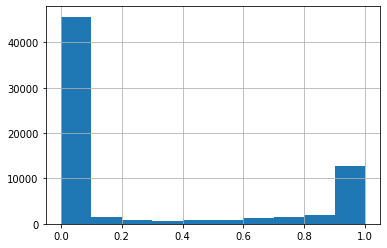

In [ ]:
smy_ress[2].hist()

In [ ]:
sum(smy_ress[3]>3.3)

28

<AxesSubplot:>

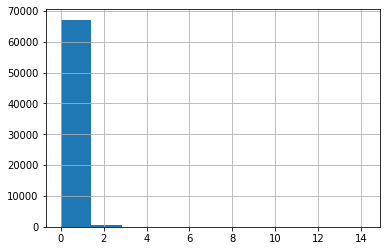

In [ ]:
smy_ress[3].hist()

In [ ]:
smy_ress[~smy_ress[0].duplicated(keep=False)].sort_values(0).to_csv('../data/wg20220316/common_variants_chr22_unimp_besthlod.csv',header=False,index=False)

In [ ]:
smy_ress

,0,1,2,3
2325,chr22:15528179:G:T_A0,LOD0.35,0.063809,0.001123
468,chr22:15528424:T:C_A0,LOD0.5,0.000000,0.000000
2302,chr22:15528913:C:T_A0,LOD0.35,1.000000,0.706557
2071,chr22:15690112:C:T_A0,LOD0.5,0.000000,0.000000
2348,chr22:15690174:G:C_A0,LOD0.5,0.000000,0.000000
...,...,...,...,...
512,chr22:50796715:AACACAC:A_A0,LOD0.5,0.000000,0.000000
1000,chr22:50797531:T:C_A0,LOD0.45,0.818388,0.003556
584,chr22:50797551:G:A_A0,LOD0.5,0.000000,0.000000
652,chr22:50797585:A:AT_A0,LOD0.5,0.000000,0.000000


### The results of linkage analysis without haplotype imputation

In [ ]:
def format_fam_lods(res,cutoff=0):
    new_res,variants=[],[]
    for i in res:
        new_res.append(i)
        variants.append(i.index)
    variants = list(set().union(*variants))
    cutoff = len(new_res)//10
    var_res={}
    for v in variants:
        varlods = [r.loc[v] for r in res if v in r.index]
        if len(varlods)>cutoff:
            var_res[v]=pd.concat(varlods,axis=1)
    return var_res

In [ ]:
def get_lods_chrom(prefix,population=None,fam_pop=None):
    path_ress=glob.glob(prefix)
    ress = [get_lods_batch(x,population,fam_pop) for x in path_ress]
    return pd.concat(ress)

In [ ]:
def get_lods_batch(path,population=None,fam_pop=None):
    with open(path, 'rb') as handle:
        res=pickle.load(handle)
        if population and fam_pop:
            with open(path[:-4]+'input', 'rb') as handle:
                gene_variants,gene_fam_haps=pickle.load(handle)
            res={k:r for k,r in zip(gene_fam_haps.keys(),res)}
            res=[r for k,r in res.items() if fam_pop[k]==population]
    res_d=format_fam_lods(res)
    #sum lods among families
    lods=pd.concat([x.sum(axis=1) for x in res_d.values()],axis=1).T
    lods.index=list(res_d.keys())
    return lods

In [ ]:
unimp_lods = get_lods_chrom('../data/wg20220419/chr22test/tmp/CACHE/chr22test*cutoff0.05unimputed.lods')

In [ ]:
unimp_lods[~unimp_lods.index.duplicated(keep=False)].sort_index().to_csv('../data/wg20220419/common_variants_chr22_unimputed_lods_afreq.csv',header=True,index=True)

In [ ]:
imp_lods = get_lods_chrom('../data/wg20220316/chr22test/tmp/CACHE/chr22test*cutoff0.05.lods')

In [ ]:
imp_lods[~imp_lods.index.duplicated(keep=False)].sort_index().to_csv('../data/wg20220316/common_variants_chr22_imputed_lods.csv',header=True,index=True)

In [ ]:
unimp_lods[~unimp_lods.index.duplicated(keep=False)].sort_index()

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
chr22:15528179:G:T_A0,-32.865314,-20.718655,-13.477560,-8.518814,-5.084669,-2.789123,-1.361750,-0.570686,-0.200910,-0.059362
chr22:15528424:T:C_A0,-56.326220,-38.997829,-27.216269,-18.580362,-12.211651,-7.594933,-4.364218,-2.221629,-0.909897,-0.216678
chr22:15528913:C:T_A0,-57.170882,-30.158719,-17.918604,-10.315593,-5.431766,-2.412424,-0.733310,0.007738,0.167133,0.073884
chr22:15690112:C:T_A0,-43.944252,-25.223905,-16.318353,-10.576501,-6.649572,-3.963524,-2.186338,-1.079456,-0.447337,-0.126851
chr22:15690174:G:C_A0,-57.817879,-33.486745,-22.004742,-14.586083,-9.470016,-5.899936,-3.443841,-1.810807,-0.787299,-0.216964
...,...,...,...,...,...,...,...,...,...,...
chr22:50796715:AACACAC:A_A0,-19.347216,-9.852300,-5.905783,-3.545598,-2.036089,-1.074975,-0.493489,-0.176677,-0.034652,0.006403
chr22:50797531:T:C_A0,-50.922334,-30.718667,-20.252772,-13.290784,-8.402162,-4.980386,-2.679220,-1.244790,-0.453382,-0.095518
chr22:50797551:G:A_A0,-77.786887,-41.880958,-26.309041,-16.698828,-10.301307,-6.011128,-3.221507,-1.516207,-0.569070,-0.121991
chr22:50797585:A:AT_A0,-72.418858,-40.112799,-25.085471,-15.638527,-9.374012,-5.250639,-2.658615,-1.160853,-0.401553,-0.085141


In [ ]:
imp_lods[~imp_lods.index.duplicated(keep=False)].sort_index()

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
chr22:15528179:G:T_A0,-61.249079,-32.229255,-18.088675,-9.388691,-3.960690,-0.836448,0.599598,0.864353,0.481489,0.017087
chr22:15528424:T:C_A0,-71.677497,-39.900844,-23.657333,-13.340945,-6.663076,-2.553687,-0.344478,0.499070,0.495211,0.175396
chr22:15528913:C:T_A0,-95.158234,-37.685229,-15.639878,-3.731533,2.642066,5.425318,5.754261,4.503841,2.524479,0.732946
chr22:15690112:C:T_A0,-65.670729,-35.213355,-21.612927,-13.125850,-7.548071,-3.953691,-1.804542,-0.693949,-0.252285,-0.121961
chr22:15690174:G:C_A0,-82.863069,-44.241637,-26.805311,-16.205588,-9.378065,-5.024949,-2.405265,-0.995681,-0.364821,-0.133111
...,...,...,...,...,...,...,...,...,...,...
chr22:50796715:AACACAC:A_A0,-26.006914,-10.226386,-4.527577,-1.561666,0.003868,0.709640,0.862430,0.684735,0.369691,0.094783
chr22:50797531:T:C_A0,-68.228174,-35.682482,-20.256133,-10.813819,-4.853337,-1.292188,0.504773,1.031303,0.771346,0.254898
chr22:50797551:G:A_A0,-124.310014,-62.962144,-36.859359,-21.223897,-11.312071,-5.186372,-1.746536,-0.187279,0.199784,0.080329
chr22:50797585:A:AT_A0,-101.865564,-52.402966,-29.858844,-16.227734,-7.713405,-2.666377,-0.098603,0.755082,0.607304,0.159375


In [ ]:
sum(unimp_lods.max(axis=1)>3.3)

1196

In [ ]:
unimp_lods_nfe = get_lods_chrom('../data/wg20220419/chr22test/tmp/CACHE/chr22test*cutoff0.05unimputed.lods','AF_nfe',fam_pop)

In [ ]:
unimp_lods_nfe[~unimp_lods_nfe.index.duplicated(keep=False)].sort_index().to_csv('../data/wg20220419/common_variants_chr22_unimputed_lods_afreq_nfe.csv',header=True,index=True)

In [ ]:
sum(unimp_lods_nfe.max(axis=1)>3.3)

2

In [ ]:
unimp_lods_nfe.loc[unimp_lods_nfe.max(axis=1)>3.3,]

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
chr22:15775793:G:A_A0,4.884759,4.280524,3.614180,2.932717,2.268181,1.64729,1.094996,0.634980,0.288598,0.073147
chr22:18876007:T:G_A0,3.715338,3.556326,3.191606,2.713049,2.177897,1.63118,1.112659,0.659147,0.304561,0.078016


In [ ]:
unimp_lods_amr = get_lods_chrom('../data/wg20220419/chr22test/tmp/CACHE/chr22test*cutoff0.05unimputed.lods','AF_amr',fam_pop)

In [ ]:
unimp_lods_amr[~unimp_lods_amr.index.duplicated(keep=False)].sort_index().to_csv('../data/wg20220419/common_variants_chr22_unimputed_lods_afreq_amr.csv',header=True,index=True)

In [ ]:
sum(unimp_lods_amr.max(axis=1)>3.3)

1203

In [ ]:
unimp_lods_nfe

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
chr22:17507312:G:A_A0,-16.529143,-9.553067,-6.046959,-3.773623,-2.251671,-1.254748,-0.636130,-0.282669,-0.101850,-0.022264
chr22:17427614:A:G_A0,-34.350142,-18.566414,-11.784474,-7.649739,-4.890476,-2.999084,-1.710838,-0.864326,-0.349042,-0.081379
chr22:16646120:GACAGA:G_A0,-8.019956,-5.983271,-4.320847,-3.021901,-2.027171,-1.284990,-0.752147,-0.389951,-0.162634,-0.039336
chr22:15699861:A:G_A0,-13.380781,-8.698831,-5.649941,-3.524944,-2.054965,-1.079814,-0.481645,-0.161528,-0.029101,0.000767
chr22:17593780:C:A_A0,-27.481414,-15.034815,-9.365490,-5.846103,-3.528068,-2.004810,-1.041123,-0.472738,-0.171583,-0.036766
...,...,...,...,...,...,...,...,...,...,...
chr22:50742506:C:T_A0,-15.913810,-8.918723,-5.550346,-3.407540,-1.993619,-1.080114,-0.524049,-0.217669,-0.071844,-0.014700
chr22:50791970:G:A_A0,-8.036006,-5.050914,-3.330463,-2.169817,-1.364544,-0.811215,-0.443740,-0.213442,-0.081722,-0.017953
chr22:50791171:T:TCTC_A0,-21.972510,-12.645061,-8.292003,-5.480442,-3.535216,-2.174490,-1.240858,-0.628002,-0.255175,-0.059895
chr22:50774447:A:C_A0,-22.948647,-12.700678,-7.993088,-5.030870,-3.060415,-1.751081,-0.911402,-0.409971,-0.144660,-0.029873


In [ ]:
with open('../data/fam_pop.pickle', 'rb') as handle:
    fam_pop=pickle.load(handle)

In [ ]:
#lods
path='../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05unimputed.lods'
with open(path, 'rb') as handle:
    res=pickle.load(handle)

In [ ]:
#fam
path='../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05unimputed.input'
with open(path, 'rb') as handle:
    gene_variants,gene_fam_haps=pickle.load(handle)

In [ ]:
path='../data/wg20220316/chr22test/tmp/CACHE/chr22test0cutoff0.05unimputed.lods'
tmp=get_lods_batch(path,'AF_amr',fam_pop)

In [ ]:
sum(tmp.max(axis=1)>3.3)

69

In [ ]:
res={k:r for k,r in zip(gene_fam_haps.keys(),res)}

In [ ]:
res_amr=[r for k,r in res.items() if fam_pop[k]=='AF_amr']

In [ ]:
res_nfe=[r for k,r in res.items() if fam_pop[k]=='AF_nfe']

In [ ]:
res_d=format_fam_lods(res_nfe)
lods=pd.concat([x.sum(axis=1) for x in res_d.values()],axis=1).T
lods.index=list(res_d.keys())

In [ ]:
lods_nfe=lods

In [ ]:
lods_amr=lods

In [ ]:
lods_all=lods

In [ ]:
sum(lods_all.max(axis=1)>3.3)

47

In [ ]:
sum(lods_amr.max(axis=1)>3.3)

69

In [ ]:
sum(lods_nfe.max(axis=1)>3.3)

1

In [ ]:
len(res_nfe)

191

In [ ]:
pd.Series([fam_pop[k] for k in res.keys()]).value_counts()

AF_amr    260
AF_nfe    191
AF_afr     25
AF          3
dtype: int64